In [1]:
import pandas as pd
import numpy as np

In [351]:
train = pd.read_csv("train_ctrUa4K (1).csv")
test = pd.read_csv("test_lAUu6dG.csv")
sampl = pd.read_csv("sample_submission_49d68Cx.csv")

In [204]:
train.shape, test.shape, sampl.shape

((614, 13), (367, 12), (367, 2))

In [205]:
sampl.Loan_Status.value_counts()

N    367
Name: Loan_Status, dtype: int64

In [352]:
data = pd.concat([train, test], sort=False)
data.shape

(981, 13)

In [207]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [209]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [210]:
data.select_dtypes(include='object').head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y


In [211]:
data.select_dtypes(include=['int64','float64']).head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


In [212]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Gender            24
Married            3
Dependents        25
Self_Employed     55
Loan_Status      367
dtype: int64

In [213]:
data.select_dtypes(include=['int64','float64']).isnull().sum()[data.select_dtypes(include=['int64','float64']).isnull().sum()>0]

LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [214]:
data.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [215]:
data[data['Credit_History']==0]["Education"].value_counts()

Graduate        106
Not Graduate     42
Name: Education, dtype: int64

## Impute
#### Gender

In [353]:
data['Gender'].fillna(data.Gender.mode()[0], inplace = True)

In [217]:
# train['Gender'].fillna(train.Gender.mode()[0], inplace = True)
# test['Gender'].fillna(test.Gender.mode()[0], inplace = True)

#### Married

In [354]:
data.Married.fillna(data.Married.mode()[0], inplace=True)

In [282]:
# train.Married.fillna(train.Married.mode()[0], inplace = True)
# test.Married.fillna(test.Married.mode()[0], inplace = True)

#### Self_Employed

In [355]:
data.Self_Employed.fillna('No', inplace=True)

In [225]:
# train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace = True)
# test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace=True)

#### Dependents 

In [356]:
data.Dependents.fillna(data.Dependents.mode()[0], inplace = True)

In [227]:
# train.Dependents.fillna(train.Dependents.mode()[0], inplace = True)
# test.Dependents.fillna(test.Dependents.mode()[0], inplace=True)

#### LoanAmount

In [228]:
# train[train['Education'] == 'Not Graduate']['LoanAmount'].mean()
# test[test['Education'] == 'Not Graduate']['LoanAmount'].mean() #118.40

# train[train['Education'] == 'Graduate']['LoanAmount'].mean()
# test[test['Education'] == 'Graduate']['LoanAmount'].mean()  #(141.35+154.06)/2 = 147.70

In [357]:
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace = True)

In [230]:
# train.LoanAmount.fillna(train.LoanAmount.mean(), inplace = True)
# test.LoanAmount.fillna(test.LoanAmount.mean(), inplace = True)

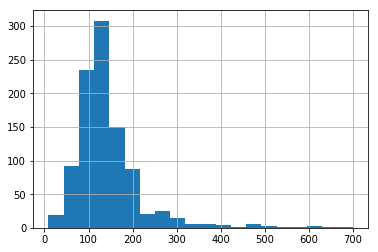

In [287]:
data['LoanAmount'].hist(bins=20) 

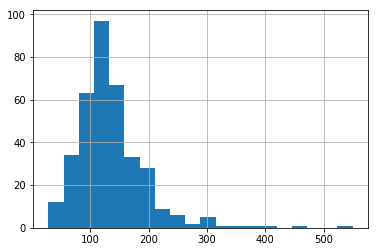

In [288]:
test['LoanAmount'].hist(bins = 20)

In [358]:
data['LoanAmount_log'] = np.log(data.LoanAmount)
# test['LoanAmount_log'] = np.log(test.LoanAmount)

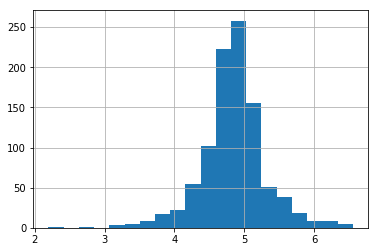

In [290]:
data['LoanAmount_log'].hist(bins=20) 

In [291]:
# test['LoanAmount_log'].hist(bins=20) 

#### Loan_Amount_Term

In [292]:
# test.Loan_Amount_Term.mode()

In [359]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace = True)

In [294]:
# train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0], inplace = True)
# test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0], inplace = True)

#### Credit_History

In [360]:
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace = True)

In [242]:
# train.Credit_History.fillna(train.Credit_History.mode()[0], inplace = True)
# test.Credit_History.fillna(test.Credit_History.mode()[0], inplace = True)

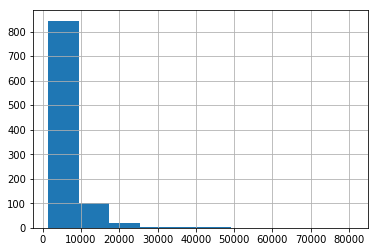

In [361]:
data['TotalIncome'] = data['ApplicantIncome'] + data ['CoapplicantIncome']
data['TotalIncome_Log'] = np.log(data['TotalIncome'])
data.TotalIncome.hist()

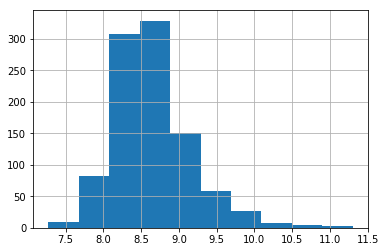

In [333]:
data.TotalIncome_Log.hist()

In [248]:
# train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
# train['TotalIncome_log'] = np.log(train['TotalIncome'])

In [251]:
# train['TotalIncome_log'].hist()

In [362]:
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Loan_Status    367
dtype: int64

In [363]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,4.959423,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [364]:
OneHotEncoding =  pd.get_dummies(data[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']])


In [378]:
data = data[['Loan_Status','LoanAmount','ApplicantIncome','CoapplicantIncome']]

In [379]:
total_df = pd.concat([data, OneHotEncoding],axis = 1, sort =False)

In [380]:
total_df.head()

,Loan_Status,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,142.51153,5849,0.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,N,128.00000,4583,1508.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,Y,66.00000,3000,0.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,Y,120.00000,2583,2358.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,Y,141.00000,6000,0.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [381]:
train = total_df[:len(train)]
test = total_df[len(train):]

In [382]:
X_train=train.drop(['Loan_Status'],axis=1)
y_train=train['Loan_Status']

In [383]:
test = test.drop(['Loan_Status'],axis=1)

In [384]:
test.shape, X_train.shape

((367, 19), (614, 19))

In [233]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column. 
# train['Gender']= label_encoder.fit_transform(train['Gender']).astype('int64')
# test['Gender']= label_encoder.fit_transform(test['Gender']).astype('int64')

# train['Married']= label_encoder.fit_transform(train['Married']).astype('int64')
# test['Married']= label_encoder.fit_transform(test['Married']).astype('int64')
  
# train['Dependents']= label_encoder.fit_transform(train['Dependents']).astype('int64')
# test['Dependents']= label_encoder.fit_transform(test['Dependents']).astype('int64')

# train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed']).astype('int64')
# test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed']).astype('int64')

# train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status']).astype('int64') 
# #test['Loan_Status']= label_encoder.fit_transform(test['Loan_Status'])

# train['Education']= label_encoder.fit_transform(train['Education']).astype('int64')
# test['Education']= label_encoder.fit_transform(test['Education']).astype('int64')

# train['Property_Area']= label_encoder.fit_transform(train['Property_Area']).astype('int64')
# test['Property_Area']= label_encoder.fit_transform(test['Property_Area']).astype('int64')



In [235]:
# train = train.drop('Loan_ID', axis = 1)
# test = test.drop('Loan_ID', axis = 1)

In [170]:
# train.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome','TotalIncome'],axis =1,inplace = True)
# test.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome','TotalIncome'],axis=1,inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.7, random_state=1234)

In [385]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()

In [86]:
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier()

In [84]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(penalty='l2',solver='lbfgs')

In [271]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100)

In [391]:
# categorical_features_indices = np.where(train.dtypes != np.float)[0]
# categorical_features_indices

In [240]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier()


In [396]:
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_validation)

# evaluate predictions
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# make predictions for train data
y_pred = model.predict(X_train)

# evaluate predictions
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on train: %.2f%%" % (accuracy * 100.0))

Accuracy on test: 78.92%
Accuracy on train: 87.65%


In [388]:
y_pred=model.predict(test)

In [389]:
output= pd.DataFrame({'Loan_ID':sampl['Loan_ID'],'Loan_Status':y_pred})
output.replace(1,'Y', inplace = True)
output.replace(0,'N', inplace=True)
output.to_csv('submission.csv', index=False)

In [390]:
output.Loan_Status.value_counts()

Y    290
N     77
Name: Loan_Status, dtype: int64